### Averaging an image stack for denoising in real and DCT space

In [12]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from scipy.fftpack import dct, idct
from os import listdir
from skimage import io

In [22]:
img_dir = r'C:\Users\Dongliang\PycharmProjects\course_digitalsreeni\images\25_sigma'

In [29]:
filenames = listdir(img_dir)
filenames.sort()
imgs = []
for f in filenames:
    # print(img_dir + "\\" + f)
    # img = cv2.imread(img_dir+"\\"+f,0)
    imgs.append((cv2.imread(img_dir+"\\"+f,0)).astype(np.float32))

In [32]:
height, width = imgs[0].shape

create two zero array, to be filled

In [34]:
avg_img = np.zeros([height, width],np.float32)
dct_avg_img = np.zeros([height, width],np.float32)

In [35]:
for i in range(len(imgs)):
    avg_img = cv2.addWeighted(avg_img, i/(1+i), imgs[i], 1/(1+i), 0)
    dct_avg_img = cv2.addWeighted(dct_avg_img, i/(i+1), dct(imgs[i]), 1/(i+1), 0)

In [36]:
reverse_img = idct(dct_avg_img)

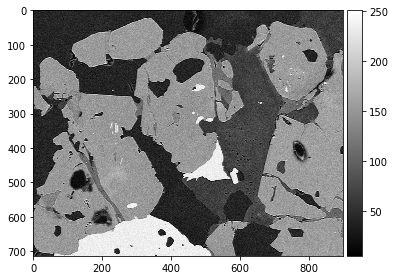

In [38]:
io.imshow(avg_img, cmap='gray')

C:\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


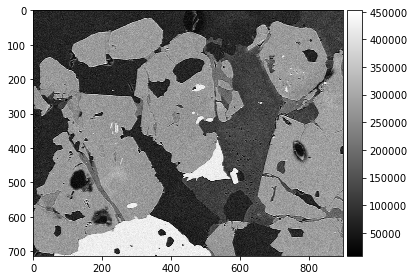

In [39]:
io.imshow(reverse_img, cmap='gray')

In [42]:
my_avg_img = np.zeros([height, width], np.float32)
for i in imgs:
    my_avg_img = my_avg_img + i
my_avg_img = my_avg_img/len(imgs)

In [48]:
my_avg_img.mean()

114.975235

In [49]:
avg_img.mean()

114.975235

the average image calculated by the cv2 function is same as mine

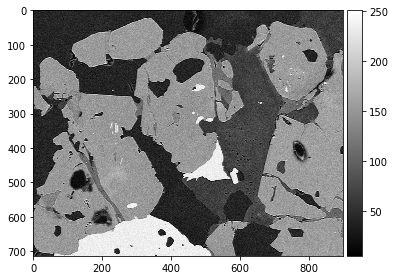

In [47]:
io.imshow(my_avg_img, cmap='gray')